In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
Input_path = 'EMG-data/EMG-data.csv'
df = pd.read_csv(Input_path)
print(df.head())
print(df.shape)

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  
(4237907, 11)


In [4]:
print("class :", df["class"].unique())
print()
#print("Labels :",df["label"].unique()) # 36 people hand gesture data
#print()
print("Value Count :\n",df["class"].value_counts())

class : [0 1 2 3 4 5 6 7]

Value Count :
 0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: class, dtype: int64


In [5]:
features = df.drop(columns=["label","class","time"])
display(features.head())
#print(features.shape())

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001


In [6]:
Class = df["class"]
print(Class.unique())
#print(Class.shape())

[0 1 2 3 4 5 6 7]


In [7]:
print(type(Class))
print(type(features))

Class = Class.values
features = features.values

print(type(Class))
print(type(features))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(features, Class, test_size=0.2, random_state=1)

In [9]:
# Normalizing data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [10]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
# creating a function for plotting

def plot(loss,val_loss,acc,val_acc):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()

In [13]:
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(8, activation='softmax')(z)

model = Model(input_tensor, output_tensor)

#SGD #RMSprop #Adam #Adadelta #Adagrad ##Adamax ###Nadam #Ftrl
opt = optimizers.Nadam(lr=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              9216      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                

In [14]:
# saving model, creating log for tensorboaed and applying few callbacks

def callbacks(Log,Dir):
  import tensorflow as tf
  import os

  Filepath = Path
  logdir = os.path.join(Filepath, Dir)
  
  callbacks_list = [tf.keras.callbacks.TensorBoard(
                    log_dir=logdir,                 #  tensorboard log path      
                    histogram_freq=1,),
                    tf.keras.callbacks.EarlyStopping(   # stop if not improving
                    monitor='val_accuracy',patience=2,),           # monitor validation accuracy
                    #tf.keras.callbacks.ReduceLROnPlateau(
                    #monitor='val_loss',factor=0.1,         # lr ko .1 se multiply kerdo (kam kerdo)
                    #patience=10,),                # reduce the lrate if val loss stop improving
                    tf.keras.callbacks.ModelCheckpoint(
                    filepath= Filepath,             # save model path
                    monitor='val_loss',             # only save best weights
                    save_best_only=True,)]
  return callbacks_list

Epoch 1/20
5298/5298 [==============================] - 21s 4ms/step - loss: 0.9109 - accuracy: 0.6452 - val_loss: 0.8882 - val_accuracy: 0.6484
Epoch 2/20
5298/5298 [==============================] - 21s 4ms/step - loss: 0.8753 - accuracy: 0.6506 - val_loss: 0.8661 - val_accuracy: 0.6513
Epoch 3/20
5298/5298 [==============================] - 21s 4ms/step - loss: 0.8508 - accuracy: 0.6589 - val_loss: 0.8399 - val_accuracy: 0.6640
Epoch 4/20
5298/5298 [==============================] - 20s 4ms/step - loss: 0.8221 - accuracy: 0.6702 - val_loss: 0.8109 - val_accuracy: 0.6755
Epoch 5/20
5298/5298 [==============================] - 20s 4ms/step - loss: 0.7912 - accuracy: 0.6841 - val_loss: 0.7832 - val_accuracy: 0.6882
Epoch 6/20
5298/5298 [==============================] - 20s 4ms/step - loss: 0.7610 - accuracy: 0.6982 - val_loss: 0.7600 - val_accuracy: 0.7005
Epoch 7/20
5298/5298 [==============================] - 20s 4ms/step - loss: 0.7321 - accuracy: 0.7118 - val_loss: 0.7341 - val_ac

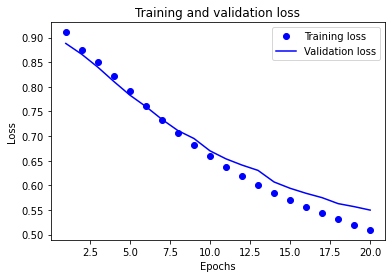

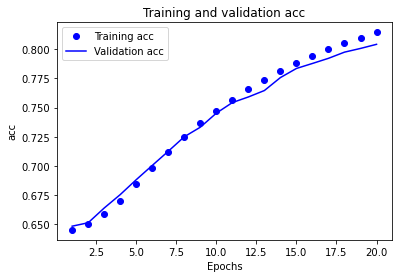

In [15]:
Path = "model1"
Dir = "my_log_dir"   
Call_B_Fun = callbacks(Path,Dir)

batch_size = 512            
epochs = 20                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2, callbacks=Call_B_Fun)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [16]:
# saving our model
model.save('model1/emg_1.h5')

In [17]:
#################

In [18]:
# loading saved model
from tensorflow.keras.models import load_model
emg = 'model1/emg_1.h5'
emg_model = load_model(emg)
emg_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              9216      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                

In [19]:
# Removing layers

new_model = Model(emg_model.inputs, emg_model.layers[-2].output) # removing layers
new_model.summary()
# removed all layers except conv

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              9216      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
Total params: 610,016
Trainable params: 610,016
Non-trainable params: 0
________________________________________________

In [20]:
from tensorflow.keras import layers, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = new_model(input_tensor)       # this is our old model
#z = layers.Dense(256, activation='relu')(x)
output_tensor = layers.Dense(8, activation='softmax')(x)

model = Model(input_tensor, output_tensor)

#SGD #RMSprop #Adam #Adadelta #Adagrad ##Adamax ###Nadam #Ftrl
opt = optimizers.Nadam(lr=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
functional_3 (Functional)    (None, 32)                610016    
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 264       
Total params: 610,280
Trainable params: 610,280
Non-trainable params: 0
_________________________________________________________________


In [21]:
def callbacks(Log,Dir):
  import tensorflow as tf
  import os

  Filepath = Path
  logdir = os.path.join(Filepath, Dir)
  
  callbacks_list = [tf.keras.callbacks.TensorBoard(
                    log_dir=logdir,                 #  tensorboard log path      
                    histogram_freq=1,),
                    tf.keras.callbacks.EarlyStopping(   # stop if not improving
                    monitor='val_loss',patience=2,),           # monitor validation loss
                    tf.keras.callbacks.ReduceLROnPlateau(
                    monitor='val_loss',factor=0.1,         # lr ko .1 se multiply kerdo (kam kerdo)
                    patience=10,),                # reduce the lrate if val loss stop improving
                    tf.keras.callbacks.ModelCheckpoint(
                    filepath= Filepath,             # save model path
                    monitor='val_loss',             # only save best weights
                    save_best_only=True,)]
  return callbacks_list

Epoch 1/30
5298/5298 [==============================] - 21s 4ms/step - loss: 0.8424 - accuracy: 0.6738 - val_loss: 0.7033 - val_accuracy: 0.7249
Epoch 2/30
5298/5298 [==============================] - 21s 4ms/step - loss: 0.6085 - accuracy: 0.7678 - val_loss: 0.5927 - val_accuracy: 0.7815
Epoch 3/30
5298/5298 [==============================] - 21s 4ms/step - loss: 0.5346 - accuracy: 0.8029 - val_loss: 0.5536 - val_accuracy: 0.8022
Epoch 4/30
5298/5298 [==============================] - 21s 4ms/step - loss: 0.5068 - accuracy: 0.8153 - val_loss: 0.5477 - val_accuracy: 0.8054
Epoch 5/30
5298/5298 [==============================] - 21s 4ms/step - loss: 0.4907 - accuracy: 0.8225 - val_loss: 0.5293 - val_accuracy: 0.8147
Epoch 6/30
5298/5298 [==============================] - 21s 4ms/step - loss: 0.4782 - accuracy: 0.8277 - val_loss: 0.5202 - val_accuracy: 0.8180
Epoch 7/30
5298/5298 [==============================] - 21s 4ms/step - loss: 0.4682 - accuracy: 0.8320 - val_loss: 0.5052 - val_ac

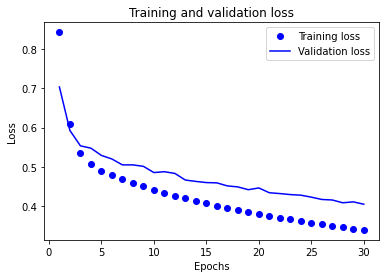

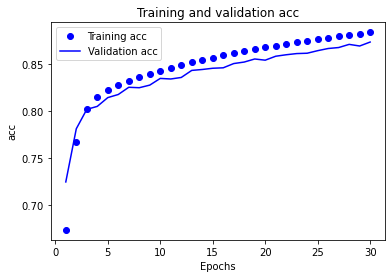

In [22]:
Path = "model2"
Dir = "my_log_dir"   
Call_B_Fun = callbacks(Path,Dir)

batch_size = 512            
epochs = 30                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2, callbacks=Call_B_Fun)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [23]:
# saving our model
model.save('model2/emg_2.h5')

In [24]:
###################

In [25]:
# loading saved model
from tensorflow.keras.models import load_model
emg = 'model2/emg_2.h5'
emg_model = load_model(emg)
emg_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
functional_3 (Functional)    (None, 32)                610016    
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 264       
Total params: 610,280
Trainable params: 610,280
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(8, activation='softmax')(z)

model = Model(input_tensor, output_tensor)

opt = optimizers.Nadam(lr=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.set_weights(emg_model.get_weights())   # using pretrained model weights

model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              9216      
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 8)                

In [27]:
callbacks_list = [tf.keras.callbacks.EarlyStopping(   # stop if not improving
                monitor='acc',patience=5,),           # monitor validation accuracy
                tf.keras.callbacks.ModelCheckpoint(
                filepath='my_model.h5',
                monitor='val_loss',                   # only save best weights
                save_best_only=True,)]                # when vall loss is improved

batch_size = 512           
epochs = 20                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2,
                    callbacks=callbacks_list)

Epoch 1/20
5298/5298 [==============================] - 20s 4ms/step - loss: 0.3340 - accuracy: 0.8866 - val_loss: 0.4053 - val_accuracy: 0.8746
Epoch 2/20
5298/5298 [==============================] - 20s 4ms/step - loss: 0.3305 - accuracy: 0.8882 - val_loss: 0.4055 - val_accuracy: 0.8745
Epoch 3/20
5298/5298 [==============================] - 19s 4ms/step - loss: 0.3284 - accuracy: 0.8891 - val_loss: 0.4011 - val_accuracy: 0.8755
Epoch 4/20
5298/5298 [==============================] - 19s 4ms/step - loss: 0.3262 - accuracy: 0.8896 - val_loss: 0.3992 - val_accuracy: 0.8765
Epoch 5/20
5298/5298 [==============================] - 19s 4ms/step - loss: 0.3237 - accuracy: 0.8906 - val_loss: 0.3925 - val_accuracy: 0.8795
Epoch 6/20
5298/5298 [==============================] - 20s 4ms/step - loss: 0.3206 - accuracy: 0.8917 - val_loss: 0.3927 - val_accuracy: 0.8798
Epoch 7/20
5298/5298 [==============================] - 20s 4ms/step - loss: 0.3183 - accuracy: 0.8928 - val_loss: 0.3961 - val_ac

In [28]:
model.save('emg_3.h5')

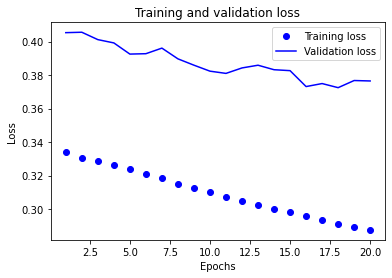

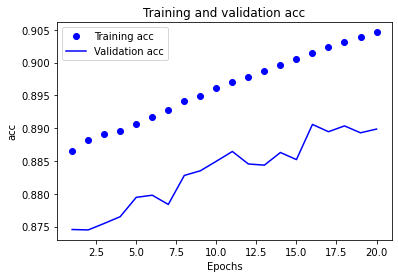

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [30]:
evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
print()
print("Test loss :",evaluation[0]*100,"%")
print("Test accuracy :",evaluation[1]*100,"%")

1656/1656 - 3s - loss: 0.3753 - accuracy: 0.8900

Test loss : 37.53182888031006 %
Test accuracy : 88.99551630020142 %


### Prediction

In [31]:
predict = 105
a = np.argmax(model.predict(x_test)[predict])
print("Predicted Class: ",a)
print("Actual Class: ",np.argmax(y_test[predict]))

Predicted Class:  7
Actual Class:  7
